In [17]:
import baseline
import importlib
importlib.reload(baseline)
from baseline import *
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('full_data.csv')

In [19]:
reduce_mem_usage(data)
data.info()

Mem. usage decreased to 685.24 Mb (76.8% reduction)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054182 entries, 0 to 11054181
Data columns (total 35 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   date_block_num                        int8   
 1   shop_id                               int8   
 2   item_cnt_month                        float16
 3   item_id                               int16  
 4   city_id                               int8   
 5   item_category_id                      int8   
 6   main_category_id                      int8   
 7   minor_category_id                     int8   
 8   shop_history                          int8   
 9   item_history                          float16
 10  minor_category_history                int8   
 11  first_sales_date_block                float16
 12  avg_item_cnt_per_cat_lag_1            float16
 13  avg_item_cnt_per_shop_lag_1           float16
 14  avg_item_cnt

LinearRegression

LinearRegression
RMSE for split 1: 0.749
RMSE for split 2: 0.707
RMSE for split 3: 0.676
Mean RMSE for all splits: 0.711


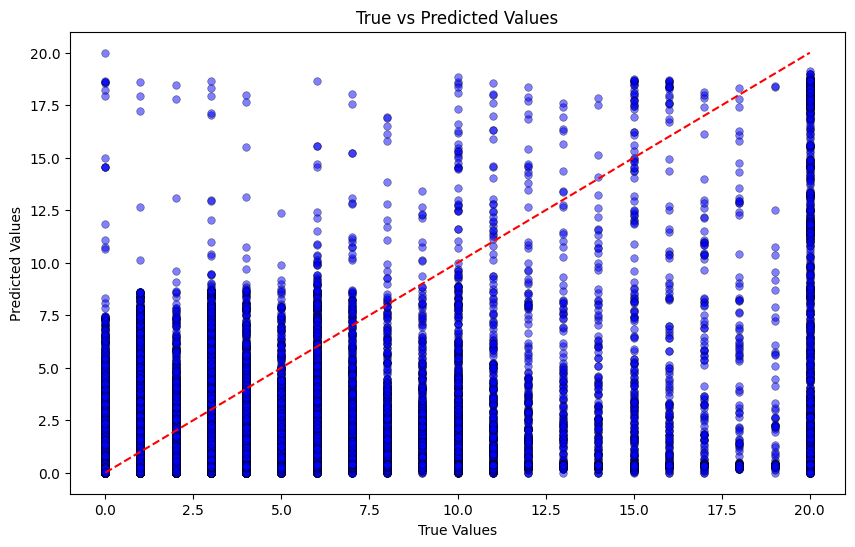

In [20]:
y_val, y_pred, model = tss_cv(df = data, n_splits = 3, model = LinearRegression())
true_pred_plot(y_val, y_pred)

In [21]:
X_test = data[data.date_block_num == 34].drop('item_cnt_month', axis = 1)

X = data[data.date_block_num != 34].drop('item_cnt_month', axis = 1)
y = data[data.date_block_num != 34]['item_cnt_month']

In [22]:
model = LinearRegression()
model.fit(X, y)
prediction(X_test, model)

'Submission file created'

Linear Regression. Submission score: 1.07154

XGBRegressor

XGBRegressor
RMSE for split 1: 0.723
RMSE for split 2: 0.685
RMSE for split 3: 0.687
Mean RMSE for all splits: 0.698


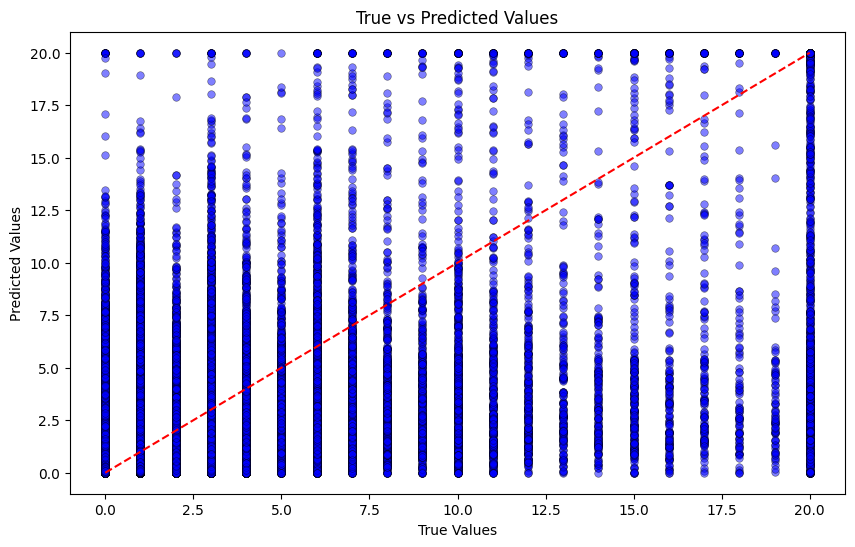

In [23]:
y_val, y_pred, model = tss_cv(df = data, n_splits = 3, model = XGBRegressor())
true_pred_plot(y_val, y_pred)

In [24]:
X_train, y_train, X_val, y_val, X_test = data_split(data)
model = XGBRegressor(n_estimators = 75, eval_metric="rmse", early_stopping_rounds = 20)
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train,y_train, eval_set=eval_set, verbose=True)
prediction(X_test, model)

[0]	validation_0-rmse:0.75166	validation_1-rmse:0.80094
[1]	validation_0-rmse:0.71676	validation_1-rmse:0.78137
[2]	validation_0-rmse:0.69708	validation_1-rmse:0.77060
[3]	validation_0-rmse:0.68583	validation_1-rmse:0.76463
[4]	validation_0-rmse:0.67827	validation_1-rmse:0.75841
[5]	validation_0-rmse:0.67284	validation_1-rmse:0.75731
[6]	validation_0-rmse:0.66963	validation_1-rmse:0.75851
[7]	validation_0-rmse:0.66677	validation_1-rmse:0.75788
[8]	validation_0-rmse:0.66397	validation_1-rmse:0.75742
[9]	validation_0-rmse:0.66215	validation_1-rmse:0.75867
[10]	validation_0-rmse:0.65885	validation_1-rmse:0.75900
[11]	validation_0-rmse:0.65511	validation_1-rmse:0.75365
[12]	validation_0-rmse:0.65298	validation_1-rmse:0.75307
[13]	validation_0-rmse:0.65069	validation_1-rmse:0.75152
[14]	validation_0-rmse:0.64862	validation_1-rmse:0.75566
[15]	validation_0-rmse:0.64755	validation_1-rmse:0.75647
[16]	validation_0-rmse:0.64630	validation_1-rmse:0.75600
[17]	validation_0-rmse:0.64467	validation

'Submission file created'

XGBRegression. Submission score: 1.01083

Higher submission score for Linear Regression means, that our data have data leakage.

LightGBM

LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3844
[LightGBM] [Info] Number of data points in the train set: 2709997, number of used features: 33
[LightGBM] [Info] Start training from score 0.205220
RMSE for split 1: 0.715
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.228239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4415
[LightGBM] [Info] Number of data points in the train set: 5419992, number of used features: 34
[LightGBM] [Info] Start training from score 0.211200
RMSE for split 2: 0.659
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.263566 seconds.
You can set `force

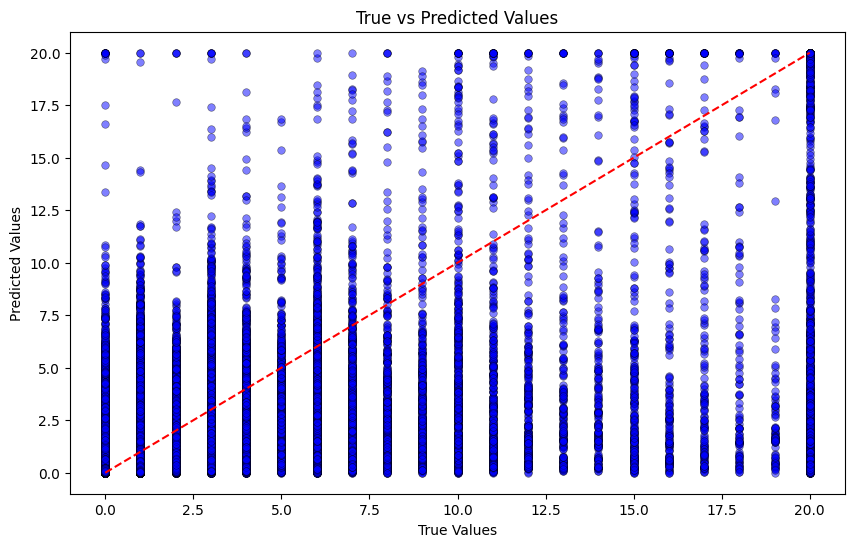

In [25]:
y_val, y_pred, model = tss_cv(df = data, n_splits = 3, model = LGBMRegressor())
true_pred_plot(y_val, y_pred)

In [26]:
model = LGBMRegressor()
X_train, y_train, X_val, y_val, X_test = data_split(data)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])
prediction(X_test, model)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.345534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4627
[LightGBM] [Info] Number of data points in the train set: 10601854, number of used features: 34
[LightGBM] [Info] Start training from score 0.206610


'Submission file created'

LightGBM. Submission score: 1.02110